In [2]:
from main import *
from data_vis import *

In [3]:
campagne = False

In [4]:
# test en campagne
if campagne == True:
    workplace1 = address('55 Av. de Bordeaux', '42000', 'Mimizan','France')
    workplace2 = address('619 Av. du Maréchal Lyautey','40600','Biscarrosse','France')

# test en ville
else:
    workplace1 = address('20 Pl. de la Défense', '92800', 'Puteaux','France')
    workplace2 = address('8 Rue Clément Ader', '78140' ,'Vélizy-Villacoublay','France')



gc_1 = get_coordinates(workplace1.address)
gc_2 = get_coordinates(workplace2.address)
mid_geoloc = get_mid_geolocalisation(gc_2, gc_1)

In [5]:
print(mid_geoloc)
print(gc_1)
print(gc_2)

(48.83829489530322, 2.2134378992422095)
(48.890961149999995, 2.2410128302190016)
(48.7856306, 2.1858611)


In [6]:

graph = get_roadmap(gc_1, gc_2)

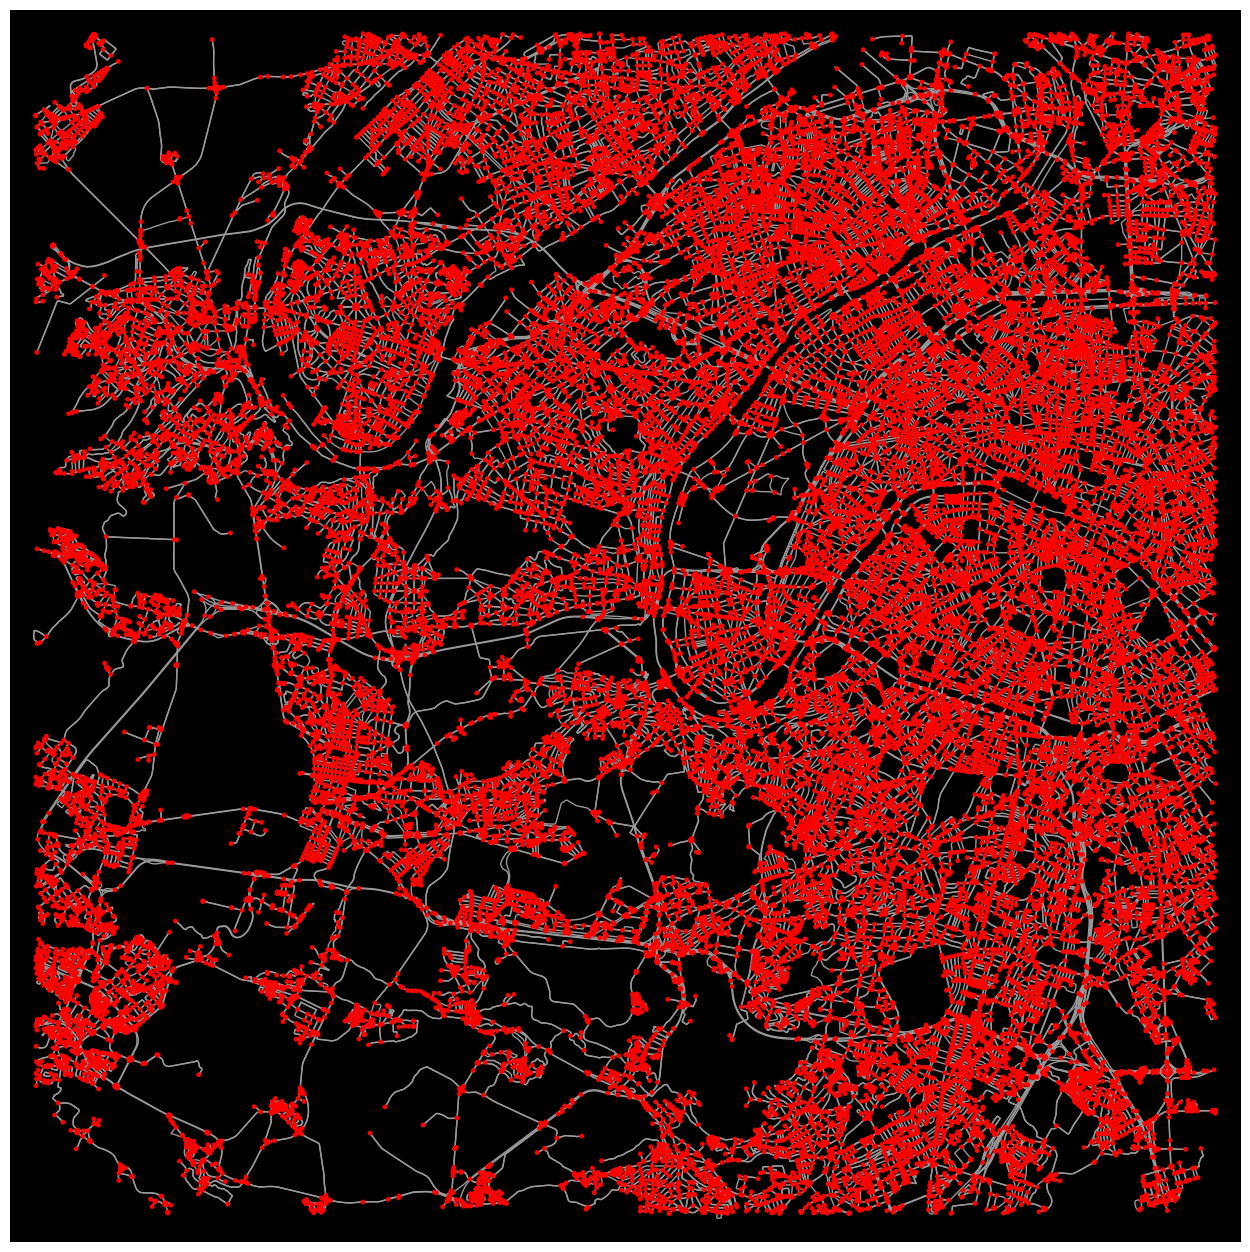

In [7]:
graph_visualisation(graph)

In [41]:
df = get_all_path_and_times(workplace1, workplace2, epsilon=0.003, min_samples=1)

Number of new centroids :  150


In [42]:
map_starting_points = map_visualisation_starting_points(df, mid_geoloc)

map_starting_points

In [43]:
df.head(10)


,node_number,node_x,node_y,path_to_wpl1,time_to_wpl1,path_to_wpl2,time_to_wpl2
0,269266258,2.256422,48.851424,"[269266258, 1166504818, 316031274, 316031275, ...",562.4,"[269266258, 1166504818, 316031274, 34818786, 2...",862.4
1,2589568357,2.255472,48.858108,"[2589568357, 361003, 358874150, 415142020, 358...",432.3,"[2589568357, 361003, 358874150, 415142020, 358...",883.3
2,916515719,2.049457,48.904320,"[916515719, 3308457900, 916515726, 367058146, ...",878.2,"[916515719, 3308457900, 916515726, 367058146, ...",1404.6
3,1844618258,2.294032,48.943178,"[1844618258, 105998912, 306948447, 5874028586,...",615.5,"[1844618258, 105998912, 306948447, 5874028586,...",1454.2
4,24987878,2.103476,48.841473,"[24987878, 25238108, 25239446, 666135676, 1833...",1058.9,"[24987878, 25238108, 25239446, 666135676, 1833...",780.9
5,2025774060,2.066554,48.844452,"[2025774060, 389062646, 895444496, 1209459714,...",1326.7,"[2025774060, 389062646, 895444496, 1209459714,...",1058.6
6,24982668,2.091668,48.843514,"[24982668, 24982512, 24982488, 25237042, 43050...",947.6,"[24982668, 24982512, 24982488, 25237042, 43050...",702.8
7,1839312728,2.059797,48.779602,"[1839312728, 243345779, 1990795685, 1839312730...",1395.8,"[1839312728, 243345779, 1990795685, 1839312730...",600.6
8,359071964,2.249840,48.866291,"[359071964, 27117303, 2499726192, 359077874, 3...",357.9,"[359071964, 2406748770, 2406748772, 2406748804...",929.5
9,27373360,2.263589,48.874071,"[27373360, 27117304, 21663255, 27373342, 30520...",331.9,"[27373360, 27117304, 1768998457, 1768998448, 2...",1007.0


/Users/loicchamberlin/Documents/loic-perso/optimum-time-place-to-live/data_vis.py:94: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



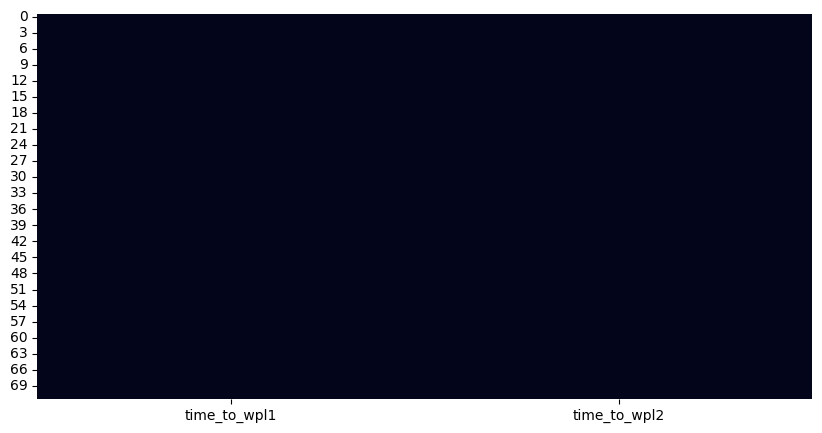

In [31]:
time_analysis(df)

In [44]:
# Calculate the sum of 'time_to_wpl1' and 'time_to_wpl2' columns
first_min_rows = top_fastest_routes(df,5)

results = first_min_rows.drop(['sum_times',	'diff_times'],axis=1)
results

,node_number,node_x,node_y,path_to_wpl1,time_to_wpl1,path_to_wpl2,time_to_wpl2,tot_times,id
50,660232393,2.214062,48.834840,"[660232393, 130045034, 417671198, 1070731384, ...",688.5,"[660232393, 8002141059, 1979248155, 130048159,...",627.7,1377.0,2
88,410723762,2.162362,48.868786,"[410723762, 410723767, 5716790793, 430464420, ...",603.5,"[410723762, 410723767, 5716790793, 430464420, ...",835.4,1670.8,2
93,428881926,2.228612,48.857318,"[428881926, 2026103181, 27180835, 27180826, 35...",469.9,"[428881926, 2026103181, 27180835, 27180826, 35...",846.3,1692.6,2
128,1758970671,2.244874,48.858567,"[1758970671, 361027, 358913441, 27117485, 1480...",436.1,"[1758970671, 2320354492, 2320354444, 108391780...",851.1,1702.2,2
0,269266258,2.256422,48.851424,"[269266258, 1166504818, 316031274, 316031275, ...",562.4,"[269266258, 1166504818, 316031274, 34818786, 2...",862.4,1724.8,2


In [37]:
# creating pandas dataframe to stock the value
dtf = pd.DataFrame(data={
                         'id': [0,1],
                         'node_y': [gc_1[0],gc_2[0]],
                         'node_x': [gc_1[1],gc_2[1]]})

dtf



,id,node_y,node_x
0,0,48.890961,2.241013
1,1,48.785631,2.185861


In [45]:
end_dtf  = pd.concat([dtf, results])
end_dtf

,id,node_y,node_x,node_number,path_to_wpl1,time_to_wpl1,path_to_wpl2,time_to_wpl2,tot_times
0,0,48.890961,2.241013,NaN,NaN,NaN,NaN,NaN,NaN
1,1,48.785631,2.185861,NaN,NaN,NaN,NaN,NaN,NaN
50,2,48.834840,2.214062,6.602324e+08,"[660232393, 130045034, 417671198, 1070731384, ...",688.5,"[660232393, 8002141059, 1979248155, 130048159,...",627.7,1377.0
88,2,48.868786,2.162362,4.107238e+08,"[410723762, 410723767, 5716790793, 430464420, ...",603.5,"[410723762, 410723767, 5716790793, 430464420, ...",835.4,1670.8
93,2,48.857318,2.228612,4.288819e+08,"[428881926, 2026103181, 27180835, 27180826, 35...",469.9,"[428881926, 2026103181, 27180835, 27180826, 35...",846.3,1692.6
128,2,48.858567,2.244874,1.758971e+09,"[1758970671, 361027, 358913441, 27117485, 1480...",436.1,"[1758970671, 2320354492, 2320354444, 108391780...",851.1,1702.2
0,2,48.851424,2.256422,2.692663e+08,"[269266258, 1166504818, 316031274, 316031275, ...",562.4,"[269266258, 1166504818, 316031274, 34818786, 2...",862.4,1724.8


In [46]:
map_ = map_visualisation_end_routes(mid_geoloc, end_dtf, graph, display_routes=True)

map_

/Users/loicchamberlin/Documents/loic-perso/optimum-time-place-to-live/data_vis.py:63: UserWarning:

The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.

/Users/loicchamberlin/Documents/loic-perso/optimum-time-place-to-live/data_vis.py:65: UserWarning:

The `folium` module has been deprecated and will be removed in a future release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.

/Users/loicchamberlin/Documents/loic-perso/optimum-time-place-to-live/

In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot with 2 rows and 1 column
fig = make_subplots(rows=2, cols=2, shared_xaxes=False, vertical_spacing=0.15)
print(len(df['sum_times']), '&', len(df['diff_times']))
# Scatter plot
scatter_trace = go.Scatter(x=df['time_to_wpl1'], y=df['time_to_wpl2'], mode='markers')
fig.add_trace(scatter_trace, row=1, col=1)
scatter_trace2 = go.Scatter(x=df['sum_times'], y=df['diff_times'], mode='markers')
fig.add_trace(scatter_trace2, row=2, col=1)

# Histogram
histogram_trace = go.Histogram(x=df['sum_times'], nbinsx=int(df['sum_times'].max() / 10) + 1)
fig.add_trace(histogram_trace, row=1, col=2)
histogram_trace2 = go.Histogram(x=df['diff_times'], nbinsx=int(df['diff_times'].max() / 10) + 1)
fig.add_trace(histogram_trace2, row=2, col=2)

# Update layout for the scatter plot
fig.update_xaxes(title_text='Time Travel to Workplace 1', row=1, col=1)
fig.update_yaxes(title_text='Time Travel to Workplace 2', row=1, col=1)

fig.update_xaxes(title_text='sum_times', row=2, col=1)
fig.update_yaxes(title_text='diff_times', row=2, col=1)

fig.update_layout(title_text='time2 of times 1 scatter & histogram of sum of times 1&2', height=600)

# Update layout for the histogram
fig.update_xaxes(title_text='Sum of both time travels (s)', row=1, col=2)
fig.update_yaxes(title_text='Number of nodes', row=1, col=2)

fig.update_xaxes(title_text='Difference of both time travels (s)', row=2, col=2)
fig.update_yaxes(title_text='Number of nodes', row=2, col=2)
# Display the combined figure
fig.show()


25 & 25
